# 1D noiseless illustrative example


In [1]:
# import standard libraries
from mfbml.problems.illutrative_problems import mf_Forrester
from mfbml.methods.mf_rbf_kriging import MFRBFKriging
from mfbml.methods.rbf_regressor import RBFKernelRegression
from mfbml.metrics.accuracy_metrics import normalized_mae, normalized_rmse
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")
# import third-party libraries

# import local libraries

In [2]:
# fix the random seed for reproducibility
seed_number = 123
np.random.seed(seed_number)

## Get function and design of experiment


In [3]:
# define function
func = mf_Forrester()
design_space = np.array([0, 1])
# define sampler
# sampler = MFSobolSequence(design_space=design_space, seed=1)
# sample_x = sampler.get_samples(num_hf_samples=4, num_lf_samples=11)
# update sample_x['hf']
sample_xh = np.array([0.0, 0.4, 0.6, 1.0]).reshape((-1, 1))
sample_xl = np.linspace(0, 1, 11, endpoint=True).reshape((-1, 1))
sample_x = [sample_xh, sample_xl]
# get response
sample_yh = func.hf(sample_x[0])
sample_yl = func.lf_2(sample_x[1])
sample_y = [sample_yh, sample_yl]
# generate test samples
test_x = np.linspace(0, 1, 1000).reshape(-1, 1)
test_hy = func.hf(test_x)
test_ly = func.lf_2(test_x)

### MF-RBF-Krging with linear lf surrogate


In [4]:
start_time = time.time()
linear_model = MFRBFKriging(
    design_space=func.design_space,
    optimizer_restart=20,
    seed=seed_number
)
linear_model.lf_model = RBFKernelRegression(
    design_space=func.design_space, params_optimize=False
)
linear_model.train(samples=sample_x,
                   responses=sample_y)
linear_pred_y, linear_pred_std = linear_model.predict(
    X=test_x, return_std=True)

# get prediction of low fidelity
pred_ly = linear_model.predict_lf(X=test_x)
end_time = time.time()
print("time: ", end_time - start_time)

# calculate accuracy metrics
nrmse_linear = normalized_rmse(test_hy, linear_pred_y)
nmae_linear = normalized_mae(test_hy, linear_pred_y)
r2_linear = r2_score(test_hy, linear_pred_y)
cpu_time_linear = end_time - start_time
print("nrmse: ", nrmse_linear)
print("nmae: ", nmae_linear)
print("r2: ", r2_linear)
print("cpu_time: ", cpu_time_linear)

time:  0.062272071838378906
nrmse:  0.007260479255726432
nmae:  0.017530855041700887
r2:  0.9999822268894117
cpu_time:  0.062272071838378906


## MF-RBF-Krging with linear lf surrogate(without bias)


In [5]:
# train model
start_time = time.time()
linear_without_const_model = MFRBFKriging(
    design_space=func.design_space,
    lf_poly_order="linear_without_const",
    optimizer_restart=20,
)
linear_without_const_model.lf_model = RBFKernelRegression(
    design_space=func.design_space, params_optimize=False
)
linear_without_const_model.train(samples=sample_x,
                                 responses=sample_y)
# get prediction of low fidelity
linear_without_const_pred_ly = linear_without_const_model.predict_lf(X=test_x)
# get prediction of high fidelity
linear_without_const_pred_hy, linear_without_const_pred_std = (
    linear_without_const_model.predict(X=test_x, return_std=True)
)
end_time = time.time()
# calculate accuracy metrics
nrmse_linear_without_const = normalized_rmse(
    test_hy, linear_without_const_pred_hy)
nmae_linear_without_const = normalized_mae(
    test_hy, linear_without_const_pred_hy)
r2_linear_without_const = r2_score(test_hy, linear_without_const_pred_hy)
cpu_time_linear_without_const = end_time - start_time

# print accuracy metrics
print("normalized rmse: ", nrmse_linear_without_const)
print("normalized mae: ", nmae_linear_without_const)
print("r2: ", r2_linear_without_const)
print("cpu_time: ", cpu_time_linear_without_const)

normalized rmse:  0.007246057149893062
normalized mae:  0.017524770503425515
r2:  0.9999822974277583
cpu_time:  0.08407998085021973


In [6]:
# quadratic model
start_time = time.time()
quadratic_model = MFRBFKriging(
    design_space=func.design_space, lf_poly_order="quadratic", optimizer_restart=20
)
quadratic_model.lf_model = RBFKernelRegression(design_space=func.design_space,
                                               params_optimize=False)
quadratic_model.train(samples=sample_x, responses=sample_y)
# get prediction of low fidelity
quadratic_pred_ly = quadratic_model.predict_lf(X=test_x)
# get prediction of high fidelity
quadratic_pred_hy, quadratic_pred_std = quadratic_model.predict(
    X=test_x, return_std=True
)
end_time = time.time()

# calculate accuracy metrics
nrmse_quadratic = normalized_rmse(test_hy, quadratic_pred_hy)
nmae_quadratic = normalized_mae(test_hy, quadratic_pred_hy)
r2_quadratic = r2_score(test_hy, quadratic_pred_hy)
cpu_time_quadratic = end_time - start_time

# print accuracy metrics
print("normalized rmse: ", nrmse_quadratic)
print("normalized mae: ", nmae_quadratic)
print("r2: ", r2_quadratic)
print("cpu_time: ", cpu_time_quadratic)

normalized rmse:  1.132083543869476
normalized mae:  2.373799733843675
r2:  0.5678944740524126
cpu_time:  0.18944787979125977


In [7]:
# scaled kriging
start_time = time.time()
cubic_model = MFRBFKriging(
    design_space=func.design_space, lf_poly_order="cubic", optimizer_restart=20
)
cubic_model.lf_model = RBFKernelRegression(design_space=func.design_space,
                                           params_optimize=False)
cubic_model.train(samples=sample_x, responses=sample_y)
# get prediction of low fidelity
cubic_pred_ly = cubic_model.predict_lf(X=test_x)
# get prediction of high fidelity
cubic_pred_hy, cubic_pred_std = cubic_model.predict(X=test_x, return_std=True)
end_time = time.time()

# calculate accuracy metrics
nrmse_cubic = normalized_rmse(test_hy, cubic_pred_hy)
nmae_cubic = normalized_mae(test_hy, cubic_pred_hy)
r2_cubic = r2_score(test_hy, cubic_pred_hy)
cpu_time_cubic = end_time - start_time

# print accuracy metrics
print("normalized mse: ", nrmse_cubic)
print("normalized mae: ", nmae_cubic)
print("r2: ", r2_cubic)
print("cpu_time: ", cpu_time_cubic)

normalized mse:  1.1262889100071245
normalized mae:  2.2851518830055277
r2:  0.572306666361512
cpu_time:  0.6096258163452148


In [8]:
# output the beta values for each model
print("beta values for linear model: ", linear_model.beta)
print(
    "beta values for linear without constant model: ", linear_without_const_model.beta
)
print("beta values for quadratic model: ", quadratic_model.beta)
print("beta values for scaled kriging model: ", cubic_model.beta)

beta values for linear model:  [[2.91830941]
 [1.99323047]]
beta values for linear without constant model:  [[1.99326057]]
beta values for quadratic model:  [[0.48952908]
 [2.06122326]
 [0.83458136]]
beta values for scaled kriging model:  [[ 0.92691294]
 [ 1.69552142]
 [-0.08732022]
 [-0.31596954]]


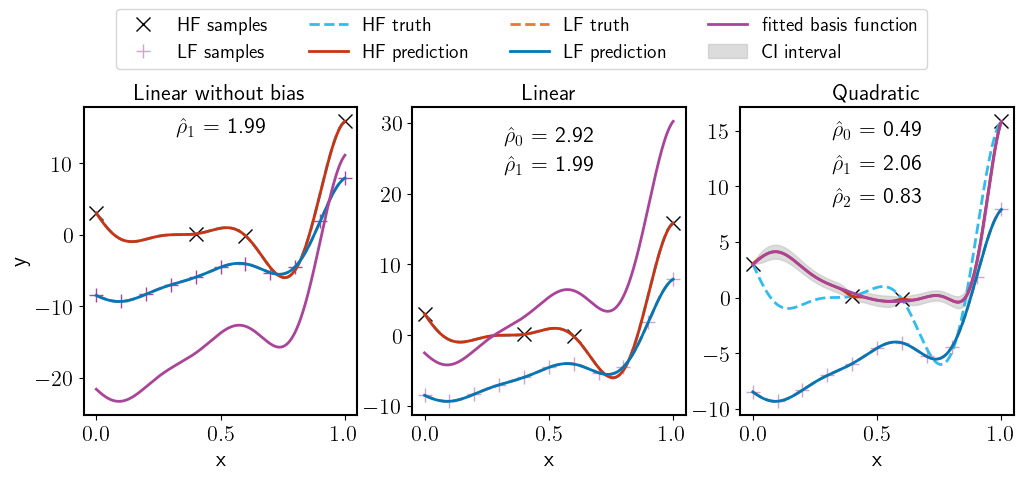

In [9]:
# plot results in 2x2 grid
font_size = 16
plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[1].plot(
    sample_x[0],
    sample_y[0],
    "kx",
    linewidth=2,
    markersize=10,
    label="HF samples",
)
ax[1].plot(
    sample_x[1],
    sample_y[1],
    "+",
    color="#AA4499",
    linewidth=2,
    markersize=10,
    alpha=0.5,
    label="LF samples",
)
ax[1].plot(test_x, test_hy, "--", color="#33BBEE",
           linewidth=2, label="HF truth")
ax[1].plot(
    test_x, linear_pred_y, "-", color="#CC3311", linewidth=2, label="HF prediction"
)
ax[1].plot(
    test_x,
    np.dot(linear_model._basis_function(test_x), linear_model.beta)
    * linear_model.yh_std
    + linear_model.yh_mean,
    "-",
    color="#AA4499",
    linewidth=2,
    label="fitted basis function",
)
ax[1].plot(test_x, test_ly, "--", color="#EE7733",
           linewidth=2, label="LF truth")
ax[1].plot(test_x, pred_ly, "-", color="#0077BB",
           linewidth=2, label="LF prediction")

ax[1].fill_between(
    test_x.flatten(),
    (linear_pred_y - 2 * linear_pred_std).flatten(),
    (linear_pred_y + 2 * linear_pred_std).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[1].set_title("Linear", fontsize=font_size)
ax[1].set_ylabel(" ", fontsize=font_size)
ax[1].set_xlabel("x", fontsize=font_size)
# ax[1].legend()
# for hierarchical kriging
ax[2].plot(
    sample_x[0],
    sample_y[0],
    "kx",
    linewidth=2,
    markersize=10,
    label="HF samples",
)
ax[2].plot(
    sample_x[1],
    sample_y[1],
    "+",
    color="#AA4499",
    linewidth=2,
    markersize=10,
    alpha=0.5,
    label="LF samples",
)
ax[2].plot(test_x, test_hy, "--", color="#33BBEE",
           linewidth=2, label="HF truth")
ax[2].plot(
    test_x, quadratic_pred_hy, "-", color="#CC3311", linewidth=2, label="HF prediction"
)
ax[2].plot(test_x, test_ly, "--", color="#EE7733",
           linewidth=2, label="LF truth")
ax[2].plot(
    test_x, quadratic_pred_ly, "-", color="#0077BB", linewidth=2, label="LF prediction"
)

ax[2].plot(
    test_x,
    np.dot(
        quadratic_model._basis_function(test_x, poly_order="quadratic"),
        quadratic_model.beta,
    )
    * quadratic_model.yh_std
    + quadratic_model.yh_mean,
    "-",
    color="#AA4499",
    linewidth=2,
    label="fitted basis function",
)
ax[2].fill_between(
    test_x.flatten(),
    (quadratic_pred_hy - 2 * quadratic_pred_std).flatten(),
    (quadratic_pred_hy + 2 * quadratic_pred_std).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[2].set_title("Quadratic", fontsize=font_size)
ax[2].set_ylabel(" ", fontsize=font_size)
ax[2].set_xlabel("x", fontsize=font_size)

# for co-kriging
# ax[3].plot(
#     sample_x["hf"],
#     sample_y["hf"],
#     "kx",
#     linewidth=2,
#     markersize=10,
#     label="HF samples",
# )
# ax[3].plot(test_x, test_hy, "--", color="#33BBEE", linewidth=2, label="HF truth")
# ax[3].plot(
#     test_x, cubic_pred_hy, "-", color="#CC3311", linewidth=2, label="HF prediction"
# )

# ax[3].plot(test_x, test_ly, "--", color="#EE7733", linewidth=2, label="LF truth")
# ax[3].plot(
#     test_x, cubic_pred_ly, "-", color="#0077BB", linewidth=2, label="LF prediction"
# )
# ax[3].plot(
#     sample_x["lf"],
#     sample_y["lf"],
#     "+",
#     color="#AA4499",
#     linewidth=2,
#     markersize=10,
#     label="LF samples",
# )
# ax[3].plot(
#     test_x,
#     np.dot(cubic_model._basis_function(test_x, poly_order="cubic"), cubic_model.beta)
#     * cubic_model.yh_std
#     + cubic_model.yh_mean,
#     "-",
#     color="#AA4499",
#     linewidth=2,
#     label=r"$\mathbf{m}(x)^T\rho$",
# )
# ax[3].fill_between(
#     test_x.flatten(),
#     (cubic_pred_hy - 2 * cubic_pred_std).flatten(),
#     (cubic_pred_hy + 2 * cubic_pred_std).flatten(),
#     alpha=0.5,
#     color="#BBBBBB",
#     label="CI interval",
# )
# ax[3].set_title("Cubic", fontsize=font_size)
# ax[3].set_ylabel(" ", fontsize=font_size)
# ax[3].set_xlabel("x", fontsize=font_size)

# for scaled kriging
ax[0].plot(
    sample_x[0],
    sample_y[0],
    "kx",
    linewidth=2,
    markersize=10,
    label="HF samples",
)

ax[0].plot(
    sample_x[1],
    sample_y[1],
    "+",
    color="#AA4499",
    linewidth=2,
    markersize=10,
    label="LF samples",
)
ax[0].plot(test_x, test_hy, "--", color="#33BBEE",
           linewidth=2, label="HF truth")
ax[0].plot(
    test_x,
    linear_without_const_pred_hy,
    "-",
    color="#CC3311",
    linewidth=2,
    label="HF prediction",
)
ax[0].plot(test_x, test_ly, "--", color="#EE7733",
           linewidth=2, label="LF truth")
ax[0].plot(
    test_x,
    linear_without_const_pred_ly,
    "-",
    color="#0077BB",
    linewidth=2,
    label="LF prediction",
)

ax[0].plot(
    test_x,
    np.dot(
        linear_without_const_model._basis_function(
            test_x, poly_order="linear_without_const"
        ),
        linear_without_const_model.beta,
    )
    * linear_without_const_model.yh_std
    + linear_without_const_model.yh_mean,
    "-",
    color="#AA4499",
    linewidth=2,
    label=r"$\mathbf{m}(\mathbf{x})^T\boldsymbol{\rho}$",
)
ax[0].fill_between(
    test_x.flatten(),
    (linear_without_const_pred_hy - 2 * linear_without_const_pred_std).flatten(),
    (linear_without_const_pred_hy + 2 * linear_without_const_pred_std).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)

ax[0].set_title("Linear without bias", fontsize=font_size)
ax[0].set_ylabel("y", fontsize=font_size)
ax[0].set_xlabel("x", fontsize=font_size)

#
ax[0].text(
    0.5,
    15.0,
    r"$\hat \rho_1$ = {:.2f}".format(
        linear_without_const_model.beta[0, 0],
    ),
    fontsize=font_size,
    ha="center",
    va="center",
    backgroundcolor="white",
)
ax[1].text(
    0.5,
    28.0,
    r"$\hat \rho_0$ = {:.2f}".format(linear_model.beta[0, 0]),
    fontsize=font_size,
    ha="center",
    va="center",
    backgroundcolor="white",
)
ax[1].text(
    0.5,
    24.0,
    r"$\hat \rho_1$ = {:.2f}".format(linear_model.beta[1, 0]),
    fontsize=font_size,
    ha="center",
    va="center",
    backgroundcolor="white",
)

ax[2].text(
    0.5,
    15.0,
    r"$\hat \rho_0$ = {:.2f}".format(
        quadratic_model.beta[0, 0],
    ),
    fontsize=font_size,
    ha="center",
    va="center",
    backgroundcolor="white",
)
ax[2].text(
    0.5,
    12.0,
    r"$\hat \rho_1$ = {:.2f}".format(
        quadratic_model.beta[1, 0],
    ),
    fontsize=font_size,
    ha="center",
    va="center",
    backgroundcolor="white",
)
ax[2].text(
    0.5,
    9.0,
    r"$\hat \rho_2$ = {:.2f}".format(
        quadratic_model.beta[2, 0],
    ),
    fontsize=font_size,
    ha="center",
    va="center",
    backgroundcolor="white",
)
# ax[3].text(
#     0.5,
#     15.0,
#     r"$\hat \rho_0$ = {:.2f}".format(
#         cubic_model.beta[0, 0],
#     ),
#     fontsize=font_size,
#     ha="center",
#     va="center",
#     backgroundcolor="white",
# )
# ax[3].text(
#     0.5,
#     12.0,
#     r"$\hat \rho_1$ = {:.2f}".format(
#         cubic_model.beta[1, 0],
#     ),
#     fontsize=font_size,
#     ha="center",
#     va="center",
#     backgroundcolor="white",
# )
# ax[3].text(
#     0.5,
#     9.0,
#     r"$\hat \rho_2$ = {:.2f}".format(
#         cubic_model.beta[2, 0],
#     ),
#     fontsize=font_size,
#     ha="center",
#     va="center",
#     backgroundcolor="white",
# )
# ax[3].text(
#     0.5,
#     6.0,
#     r"$\hat \rho_3$ = {:.2f}".format(
#         cubic_model.beta[3, 0],
#     ),
#     fontsize=font_size,
#     ha="center",
#     va="center",
#     backgroundcolor="white",
# )

plt.legend(loc="upper center", bbox_to_anchor=(-0.8, 1.35), ncol=4, fontsize=14)

# set the font size of axis
for i in range(3):
    ax[i].tick_params(axis="both", which="major", labelsize=font_size)
    # set the line width of the axis
    for axis in ["top", "bottom", "left", "right"]:
        ax[i].spines[axis].set_linewidth(1.5)
plt.savefig("different_basis_order_comparison.pdf",
            bbox_inches="tight", dpi=300)
plt.savefig("different_basis_order_comparison.png",
            bbox_inches="tight", dpi=300)
plt.savefig("different_basis_order_comparison.svg",
            bbox_inches="tight", dpi=300)
plt.show()

In [10]:
# save the results into a pandas dataframe
df = pd.DataFrame(columns=["nrmse", "nmae", "r2",
                  "lf_training_time", "hf_training_time"])
df.loc["linear_without_bias"] = [
    nrmse_linear_without_const,
    nmae_linear_without_const,
    r2_linear_without_const,
    linear_without_const_model.lf_training_time,
    linear_without_const_model.hf_training_time,
]
df.loc["linear"] = [nrmse_linear, nmae_linear, r2_linear,
                    linear_model.lf_training_time, linear_model.hf_training_time]
df.loc["quadratic"] = [
    nrmse_quadratic,
    nmae_quadratic,
    r2_quadratic,
    quadratic_model.lf_training_time,
    quadratic_model.hf_training_time,
]
df.loc["cubic"] = [
    nrmse_cubic,
    nmae_cubic,
    r2_cubic,
    cubic_model.lf_training_time,
    cubic_model.hf_training_time
]
# save the results into a csv file
df.to_csv("result_different_lf_basis_order.csv")

# print the results
print(df)

                        nrmse      nmae        r2  lf_training_time  \
linear_without_bias  0.007246  0.017525  0.999982          0.006321   
linear               0.007260  0.017531  0.999982          0.000420   
quadratic            1.132084  2.373800  0.567894          0.000445   
cubic                1.126289  2.285152  0.572307          0.062007   

                     hf_training_time  
linear_without_bias          0.073048  
linear                       0.051763  
quadratic                    0.164124  
cubic                        0.542165  
